# Nearest Neighbors

NN is a very simple idea to understand, but can be useful for high-dimensional queries, as part of more complex algorithms, or for a baseline classification.

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy.io import loadmat

In [3]:
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [4]:
from collections import Counter

## Example using `kdtree`

In [5]:
data = loadmat('data/cardio.mat')
X = data['X']
y = data['y']
y = y.squeeze()

In [6]:
X.shape

(1831, 21)

Number of data points in each class.

In [7]:
ctr = Counter(y)
ctr

Counter({0.0: 1655, 1.0: 176})

Scale to have zero mean and unit standard deviation.

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split into test and training sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

## Train a KD-tree

A KD-tree is a binary tree that splits on the median point (which is stored in the node) in the direction of maximal variance for the points in each partition. This is simply a computational method to find nearest neighbors efficiently. It is not efficient in high dimensions, and approximate methods are used for very high-dimensional data.

In [10]:
kdtre = KDTree(X_train)

### Usage 1: Find $k$ nearest neighbors

In [11]:
dist, idx = kdtre.query(X_test[:1], k=5)

In [12]:
dist

array([[2.70831149, 2.77408089, 3.46031014, 3.55954242, 3.65035015]])

In [13]:
idx

array([[ 385,  588,  574, 1333,  532]])

In [14]:
y_test[0]

1.0

In [15]:
y_train[idx[0]]

array([1., 1., 1., 1., 1.])

### PCA for visualization

In [16]:
pca = PCA(n_components=2)

In [17]:
X_train_pca = pca.fit_transform(X_train)

In [18]:
test_point_pca = pca.transform(X_test[:1])

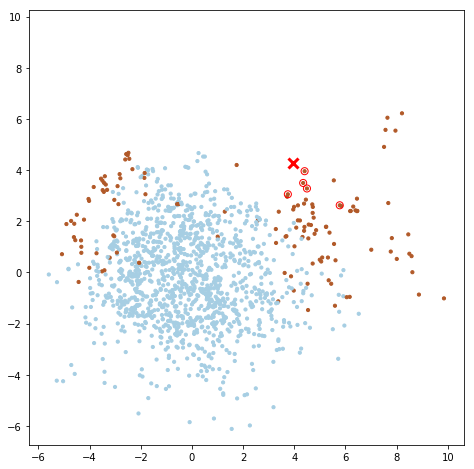

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
            c=y_train, s=10, 
            cmap=plt.cm.get_cmap('Paired', len(ctr)))
plt.scatter(test_point_pca[:, 0], test_point_pca[:, 1], 
            marker='x', s=100, c='red', linewidth=3)
plt.scatter(X_train_pca[idx[0], 0], X_train_pca[idx[0], 1], 
            edgecolor='red', facecolor='none', 
            s=50, linewidth=1)
plt.axis('square')
pass

### Usage 2: Find all neighbors within a given radius

In [20]:
idx = kdtre.query_radius(X_test[-1:], r=3)

In [21]:
test_point_pca = pca.transform(X_test[-1:])

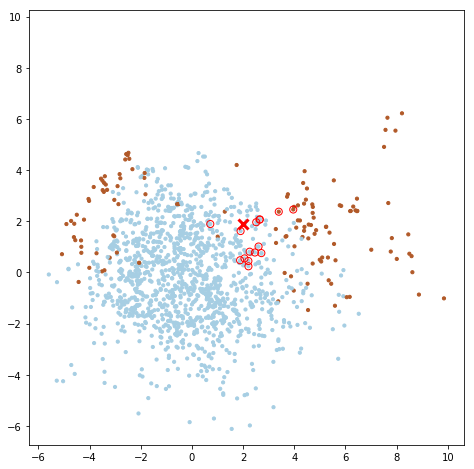

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
            c=y_train, s=10, 
            cmap=plt.cm.get_cmap('Paired', len(ctr)))
plt.scatter(test_point_pca[:, 0], test_point_pca[:, 1], 
            marker='x', s=100, c='red', linewidth=3)
plt.scatter(X_train_pca[idx[0], 0], X_train_pca[idx[0], 1], 
            edgecolor='red', facecolor='none', 
            s=50, linewidth=1)
plt.axis('square')
pass

## Using nearest neighbors for classification

In [23]:
dist, idx = kdtre.query(X_test, k=5)

In [24]:
votes = y_train[idx.ravel()].reshape(-1, 5).sum(axis=1)
y_pred = np.where(votes >= 3, 1, 0)

In [25]:
X_test_pca = pca.transform(X_test)

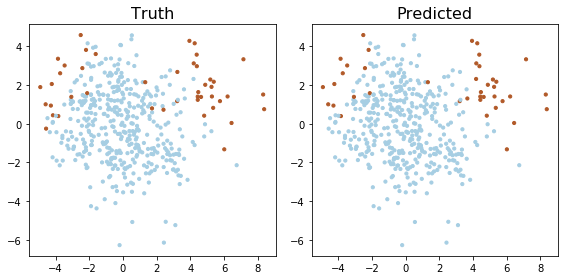

In [26]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=10,
            cmap=plt.cm.get_cmap('Paired', len(ctr)))
plt.title('Truth', fontsize=16)
plt.subplot(122)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, s=10,
            cmap=plt.cm.get_cmap('Paired', len(ctr)))
plt.title('Predicted', fontsize=16)
plt.tight_layout()
pass

## Visualizing classification boundaries

Note that we are doing this for the 2D PCA dimension-reduced data set. That is the nearest neighbors search is done in 2D, not in 21D.

In [27]:
bounds = np.c_[X_train_pca.min(axis=0), X_train_pca.max(axis=0)]

In [28]:
x = np.linspace(start=bounds[0,0], stop=bounds[0,1], num=50)
y = np.linspace(start=bounds[1,0], stop=bounds[1,1], num=50)

In [29]:
xx, yy = np.meshgrid(x, y)

In [30]:
X2 = np.c_[xx.ravel(), yy.ravel()]

In [31]:
kdtree2 = KDTree(X_train_pca)

In [32]:
dist, idx = kdtree2.query(X2, 5)
votes = y_train[idx.ravel()].reshape(-1, 5).sum(axis=1)
y_pred = np.where(votes >= 3, 1, 0)

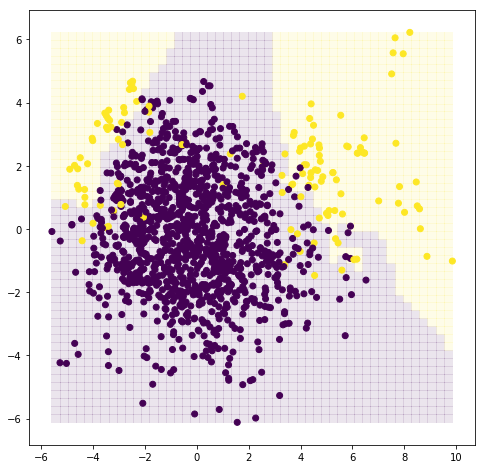

In [33]:
plt.figure(figsize=(8,8))
plt.pcolor(xx, yy, y_pred.reshape(50,50), alpha=0.1)
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c=y_train)
pass